<h1 align ="center"> REST API Basic Samples</h1>
<hr>
   
# Chat Completions

In [3]:
import base64
from IPython.display import Image, display
%run shared_functions.ipynb

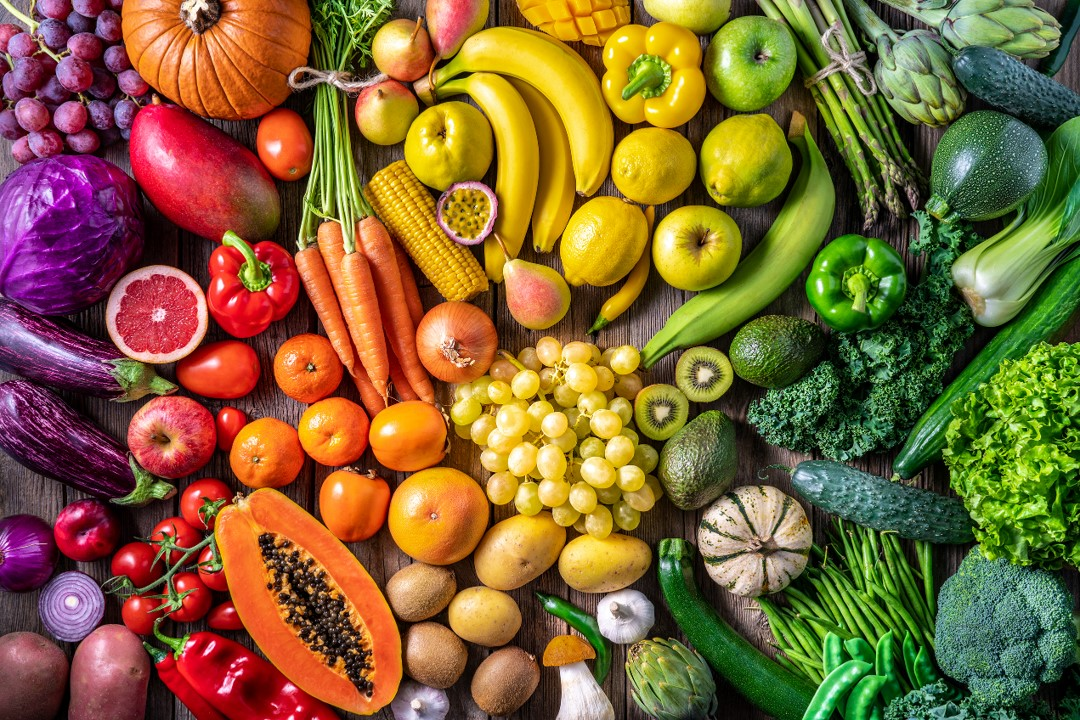

fruits, vegetables, fresh produce, colorful, healthy, organic, assorted, variety, vegan, vegetarian, food, nutrition, diet, raw, whole foods, greens, citrus, tropical, root vegetables, berries, farm produce, market, grocery, natural, vitamins, culinary ingredients, plant-based, harvest, seasonal, fiber-rich, antioxidants, agriculture.


In [4]:
#Image Tagging Assistant
image_file_path = "../../common/images/ImageTaggingAssistant.jpg"  
sys_message = "Generate a list of descriptive tags for the following image. Analyze the image carefully and produce tags that accurately represent the image. Ensure the tags are relevant."
user_prompt = "Provide tags for this image."

#Listing Assistant
"""
image_file_path = "../../common/images/ListingAssistant.jpg"  
sys_message = "You are an AI assistant which generates listings for vacation rentals.  Please generate exciting and inviting content for this image but don't talk about content that you cannot see. Follow the format of an attention-grabbing title and provide a description that is 6 sentences long."
user_prompt = "Generate content."
"""

# Encode the image in base64
with open(image_file_path, 'rb') as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

messages = [
    {
      "role": "system",
      "content": [
          {
            "type": "text", 
            "text": sys_message
          }
      ]
    },
    {
      "role": "user",
      "content": [
          {
            "type": "text",
            "text": user_prompt
          },
          {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{encoded_image}"
          }
          }
      ]
    }
  ]

try:
    response_content = call_GPT4V_image(messages)
    display(Image(image_file_path))
    print(response_content['choices'][0]['message']['content'])  # Print the content of the response
except Exception as e:
    raise SystemExit(f"Failed to call GPT-4V API. Error: {e}")